<img src="files/heading.png"/>

In [1]:
import sys,tweepy,csv,re
from textblob import TextBlob
import matplotlib.pyplot as plt

<h3>Defining function for calculating percentage upto 2 decimal places</h3>

In [2]:
def percentage(part, whole):
        temp = 100 * float(part) / float(whole)
        return format(temp, '.2f')

<h3>Storing Twitter API keys in variables</h3>

In [3]:
consumerKey = "nfSGtNsTnmBAGtYMfhcjOfNnv"
consumerSecret = "Qt7uPxWC1kNe2kreBKtCsuYKXhB3dosEZrksJJlfYRZVouWDrK"
accessToken = "1098938668285255681-G6rj2987RORDyC7xWmgkvx8P3Qssuy"
accessTokenSecret = "Gxj6CCb4gqBLY47pGW1UN82K7b7VzgfWyO93M6EtUdDM7"

In [4]:
auth = tweepy.OAuthHandler(consumerKey, consumerSecret)

In [5]:
auth.set_access_token(accessToken, accessTokenSecret)

In [6]:
api = tweepy.API(auth)

<h3>Dynamic variables for searching term and # of terms you want to stream from Twitter</h3>

In [7]:
searchTerm = "pulwama attack"
NoOfTerms = 100

<h3>Fetching tweets from Twitter by feeding the above dynamic variables into twitter search engine.</h3>

In [17]:
tweets = tweepy.Cursor(api.search, q=searchTerm, lang = "en").items(NoOfTerms)

<h3>Testing TextBlob lib for polarity generation!!</h3>

In [9]:
a=TextBlob("I am the worst coder ever.")
a.sentiment.polarity

-1.0

In [10]:
a=TextBlob("I am the best coder ever.")
a.sentiment.polarity

1.0

<h3>Initializing Counter variables for different sentiments count!</h3>

In [11]:
polarity = 0
positive=0
negative=0
neutral=0

<h3>looping through each tweet in list and updating counter variables.</h3>

In [12]:
for tweet in tweets:
#     print(tweet.text)
    analysis = TextBlob(tweet.text)
    polarity+=analysis.sentiment.polarity
    
    if (analysis.sentiment.polarity == 0):
        neutral+=1
    elif (analysis.sentiment.polarity < 0.00):
        negative+=1
    elif (analysis.sentiment.polarity > 0.00):
        positive+=1

<h3>Calculating percentage for all categories of sentiments.</h3>

In [13]:
positive = percentage(positive,NoOfTerms)
negative = percentage(negative,NoOfTerms)
neutral = percentage(neutral,NoOfTerms)

In [14]:
print("how people are reacting on "+searchTerm+" by analyzing " + str(NoOfTerms)+" Tweets.")
if(polarity==0):
    print('Neutral')
elif(polarity<0):
    print('Negative')
elif(polarity>0):
    print('Positive')

how people are reacting on pulwama attack by analyzing 100 Tweets.
Negative


<h3>Plotting pi-chart for graphical data visualization.</h3>

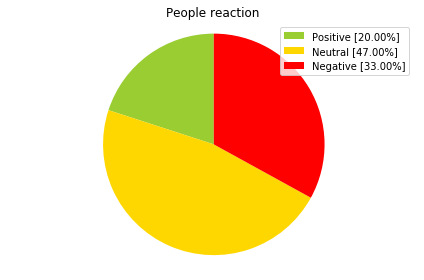

In [15]:
labels = ['Positive [' + str(positive) + '%]','Neutral [' + str(neutral) + '%]','Negative [' + str(negative) + '%]']
sizes = [positive,neutral,negative]
colors = ['yellowgreen','gold','red']
patches, texts = plt.pie(sizes, colors=colors, startangle=90)
plt.legend(patches, labels, loc="best")
plt.title('People reaction')
plt.axis('equal')
plt.tight_layout()
plt.show()

<h3>Reading the live streaming tweets which are input to NLP model.</h3>

In [18]:
for tweet in tweets:
     print(tweet.text)

RT @prabhurazdan: Some "politicians" who had become irrelevant in Kmr politics must be rejoicing Feb 14 attack on CRPF convoy in Pulwama. T…
RT @majorgauravarya: The hammer drops. Should have done this years ago. Next step...remove security of Mehbooba Mufti &amp; Abdullahs. They wil…
RT @sanhita4dr: Evn whn JeM claimed responsibility of d attack in Pulwama , Surjewala says it is some ' home grown so called terrorist" whi…
RT @khanumarfa: While there are credible reports suggesting that Prime Minister was shooting for a PR film hours after the Pulwama incident…
RT @majorgauravarya: The hammer drops. Should have done this years ago. Next step...remove security of Mehbooba Mufti &amp; Abdullahs. They wil…
RT @indonorwegian: https://t.co/TjuOKYgB9i Norway condemns terror attack in Pulwama.
RT @pawan9680602089: The Jaish-e-Mohammad terrorist attack on a convoy of security forces in Pulwama district of Jammu &amp; Kashmir on Thursda…
Trump Backs Outrage Over Pulwama Attack | Says India Look

A true depiction.. @LodhiMaleeha @iamhamzaabbasi @SaadiaAfzaal @SuddhanSadaf30 @KoblerinPAK @CynthiaDRitchie… https://t.co/Bv88lHyJWf
RT @kavita_krishnan: Criticism of Train Worries Modi More Than Demonisation of a Community: @OmarAbdullah. True. @PMOIndia said those who m…
RT @pratheesh_ahp: Thank You Twitter. 

Somebody reported that in one tweet I 'abused' terrorists behind Pulwama attack taking life of our…
RT @MumbaiMirror: Almost all claims made by @INCIndia and its president are false.

https://t.co/j5GCfn99cU
RT @kavita_krishnan: Some days ago I spoke on @OnReality_Check with @sunetrac &amp; pointed out how attacks on #KashmiriStudents aren't a 'spon…
RT @timesfactcheck: FAKE: Congress makes false claim of PM Modi shooting for film at Corbett 3 hours after Pulwama attack https://t.co/7eUa…
VERDICT Times Fact Check has found several accusation made by Congress against PM Modi to be false and baseless.… https://t.co/whqivrUi8X
RT @BhimAgniveer: Head - SC ST Cell, Agniveer @VaidSa